# Introduction

This notebook is dedicated to calculating and predicting the price of diamonds using the "Price" column as the target variable (or 'y'). The target column is a continuous variable representing the price of diamonds. The primary goal is to build and evaluate models that can accurately predict the average price of diamonds based on various features in the dataset.

To achieve this, we will deep learning framework that was Feedforward Neural Network that was used by some paramaters:
- **Activation:** Linear (because of the output was regression)
- **Loss:** MSE (Mean Squared Error)
- **Metrics:** MAE (Mean Absolute Error)

Regression-based models are particularly well-suited for this type of regression problem due to their ability to handle complex relationships between features and their robustness to different types of data distributions. Furthermore, Tree-based models are particularly well-suited for this type of regression problem due to their ability to handle complex relationships between features and their robustness to different types of data distributions.

Using these machine learning models, the workflow will follow these steps:

- **Load Data:** Import the dataset and perform initial data inspection to understand its structure and contents.
- **Data Preprocessing:** Clean the data by handling missing values, encoding categorical variables, and normalizing numerical features where necessary.
- **Train-Test Split:** Divide the dataset into training and testing sets to evaluate model performance.
- **Model Training:** Train the CatBoost and Random Forest models using the training data.
- **Model Evaluation:** Assess the performance of the trained models using various metrics.
- **Model Tuning:** Optimize model hyperparameters to improve accuracy and other performance metrics.
- **Feature Importances:** Identify and rank the features based on their importance in predicting the target variable.
- **Final Evaluation:** Conduct a final evaluation of the tuned models on the test data.

For evaluating the performance of the models, the following metrics will be used:

- **Mean Absolute Error (MAE):** The average of the absolute differences between the predicted and actual values.
- **Mean Squared Error (MSE):** The average of the squared differences between the predicted and actual values.
- **R-squared (R²): A statistical measure that represents the proportion of the variance for the target variable explained by the features.
- **Root Mean Squared Error (RMSE):** The square root of the average of the squared differences between the predicted and actual values.

By following these steps, we aim to develop robust models that can accurately predict diamond prices, aiding jewelers and retailers in setting competitive prices and optimizing their pricing strategies.

In [1]:
!nvcc -V && which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0
/opt/conda/bin/nvcc


In [2]:
!python --version
!nvidia-smi

Python 3.10.13
Tue Jul 16 14:32:59 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   53C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+--------------------------------

In [3]:
# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com
# for cudas update

# Importing Libraries

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from matplotlib import pyplot

# Library for Encoding and Imputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Library for Deep Learning Frameworks
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

2024-07-16 14:33:03.341758: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 14:33:03.341852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 14:33:03.504826: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diamonds/diamonds.csv


# Loading the Dataset

In [6]:
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")

## Dataset Information

In [7]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df = X = df.drop(['Unnamed: 0'], axis=1)

In [9]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df.describe()
# description of dataset

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.info()

# there by are 32 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [12]:
df.shape
# Dataset has 119390 rows and 32 columns

(53940, 10)

In [13]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [14]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['cut', 'color', 'clarity'], dtype='object')


In [15]:
num_cols = df.select_dtypes(include=['float', 'int64']).columns
print(num_cols)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


## Dealt with Null Values



In [16]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Empty DataFrame


# Split Data

In [17]:
X = df.drop(['price'], axis=1)
y = df['price']

# Preprocessing (Scaling & Encoding)

In [18]:
list_num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
list_cat_cols = ['cut', 'color', 'clarity']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), list_num_cols),
        ('cat', OneHotEncoder(), list_cat_cols)
    ])

In [19]:
X_transformed = preprocessor.fit_transform(X)

### Split Train Test Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 26), (10788, 26), (43152,), (10788,))

# Feedforward Neural Network (FNN)

### Build Model

In [22]:
# Learning rate scheduler

def lr_scheduler(epoch, lr):
    decay_rate = 0.96
    decay_step = 10
    if epoch % decay_step == 0 and epoch:
        return lr * decay_rate
    return lr

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
lr_callback = LearningRateScheduler(lr_scheduler, verbose=1)

In [23]:
def build_model_fnn():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    
    # 1 Hidden layers
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = build_model_fnn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [24]:
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=250, 
                    batch_size=32, 
                    callbacks=[early_stopping, lr_callback])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/250
  88/1079 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 30875648.0000 - mae: 3924.9619

I0000 00:00:1721140400.714592     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1721140400.734793     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30697862.0000 - mae: 3897.8262

W0000 00:00:1721140406.437287     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1079/1079 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 30697392.0000 - mae: 3897.8113 - val_loss: 28858596.0000 - val_mae: 3826.0933 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/250
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 26803462.0000 - mae: 3677.8037 - val_loss: 22057546.0000 - val_mae: 3392.9360 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/250
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20614172.0000 - mae: 3244.1946 - val_loss: 14383827.0000 - val_mae: 2790.9771 - learning_rate: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/250
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13797753.0000 - mae: 2642.0459 - val_loss: 8843963.0000 - val_mae: 2195.3081 - learning_rate: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/250
1079/1079 ━━━━━━━━━━

## Train Loss/Validation Loss (Model Overview)

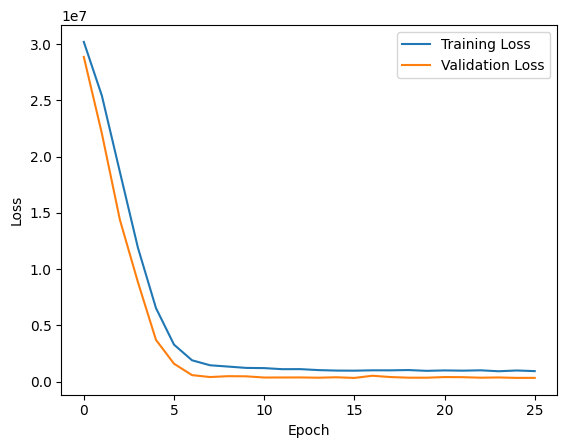

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

the model is kinda good for train validation loss

In [28]:
# Metrics Performance 

y_pred = model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R²: {r2_score(y_test, y_pred)}')

338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MAE: 307.42050983767
MSE: 353613.07224264083
RMSE: 594.6537414686305
R²: 0.9777557373134728


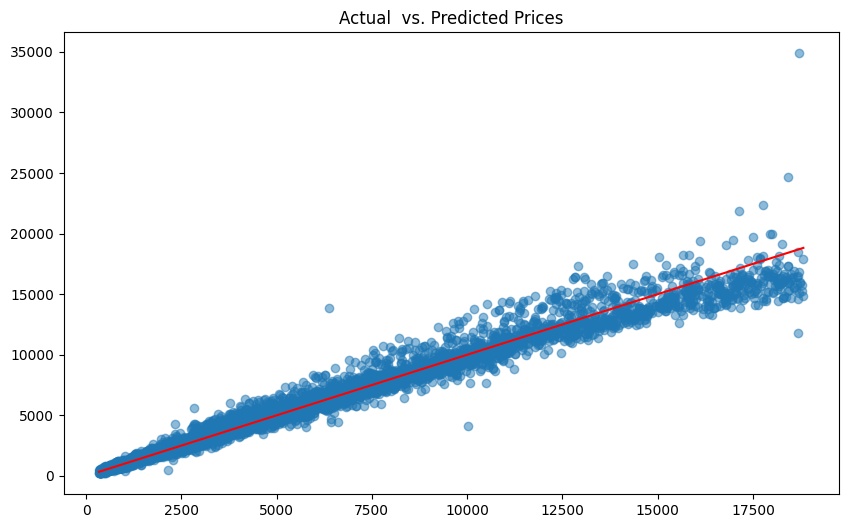

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual  vs. Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  
plt.show()

# Saving the Model

In [29]:
model.save('path/to/model.h5')

# Conclusion :

I think the model is good fit, from that we could see the Train Loss/Val Loss indicates the model was good fit. Therefore, from metrics, the values we got was:

- **Mean Absolute Error: 307.42**
- **Mean Square Error: 353613.07**
- **R-Squared: 0.97**

This one was better thatn Machine Learning models also, from MAE, MSE was lower than ML and R-Squared wa **0.97**, better than random forrest regressor that was only **0.90**.